In [308]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('max_columns', None)
data = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [309]:
import warnings
warnings.filterwarnings(action='ignore')

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [311]:
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 8693 rows and 14 columns


In [312]:
# Looking for data duplicates
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


In [313]:
# number of numerical and categorical features
num, obj = 0, 0
for feature in data:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 7 numerical features and 7 categorical features

PERCENTAGE MISSING VALUES:
The feature 'HomePlanet' has 2.31% missing values
The feature 'CryoSleep' has 2.5% missing values
The feature 'Cabin' has 2.29% missing values
The feature 'Destination' has 2.09% missing values
The feature 'Age' has 2.06% missing values
The feature 'VIP' has 2.34% missing values
The feature 'RoomService' has 2.08% missing values
The feature 'FoodCourt' has 2.11% missing values
The feature 'ShoppingMall' has 2.39% missing values
The feature 'Spa' has 2.11% missing values
The feature 'VRDeck' has 2.16% missing values
The feature 'Name' has 2.3% missing values


In [314]:
# Unique count before feature value removal:
print('Unique count before removal: ')
print(np.round((data.Transported.value_counts()*100)/len(data),2))

Unique count before removal: 
True     50.36
False    49.64
Name: Transported, dtype: float64


In [315]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' : 
        if len(data[feature].unique())==1:
            s_cunique += 1
            
        else:
            n_cunique += 1
            

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 0 categorical features that has one unique value.
There are 7 categorical features that has more than one unique value.


In [316]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
          
        else:
            n_nunique += 1
           

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 0 numerical features that has one unique value including Nan
There are 7 numerical features that has more than one unique value


In [317]:

# Number of unique values
print('\nNumber of unique values: ')
print(data.nunique())


Number of unique values: 
PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


In [318]:
del data['PassengerId']
del data['Name']
del data['Cabin']

In [319]:
# Number of unique values
print('\nNumber of unique values: ')
print(data.nunique())


Number of unique values: 
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64


In [320]:
likely_cat = {}
categorical_feature=[]
numerical_feature=[]
for var in data.columns:
    likely_cat[var] = 1.*data[var].nunique()/data[var].count() < 0.05
for key,value in likely_cat.items():
    if value == True:
        if key != 'Transported':  ##exclude target variable  
            categorical_feature.append(key)
    else:
        if key != 'Transported':  ###exclude target variable 
            numerical_feature.append(key)
categorical_feature.remove('Age')
numerical_feature.append('Age')
print(f'{categorical_feature} are categorical features')
print(f'{numerical_feature} are numerical features')

['HomePlanet', 'CryoSleep', 'Destination', 'VIP'] are categorical features
['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age'] are numerical features


In [321]:
# Count of missing values before treatment
print('Count of missing values before treatment: ')
for feature in data[categorical_feature]:
    print(f'{feature}:', data[feature].isnull().sum())
    data[feature] = data[feature].fillna(data[feature].mode()[0])




# Count of missing values after treatment
print('Count of missing values before treatment: ')
for feature in data[categorical_feature]:
    print(f'{feature}:', data[feature].isnull().sum())

Count of missing values before treatment: 
HomePlanet: 201
CryoSleep: 217
Destination: 182
VIP: 203
Count of missing values before treatment: 
HomePlanet: 0
CryoSleep: 0
Destination: 0
VIP: 0


In [322]:
# number of numerical and categorical features
num, obj = 0, 0
for feature in data:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 9 numerical features and 2 categorical features

PERCENTAGE MISSING VALUES:
The feature 'Age' has 2.06% missing values
The feature 'RoomService' has 2.08% missing values
The feature 'FoodCourt' has 2.11% missing values
The feature 'ShoppingMall' has 2.39% missing values
The feature 'Spa' has 2.11% missing values
The feature 'VRDeck' has 2.16% missing values


In [323]:
print('Data type of missing features: ')
for feature in data[numerical_feature]:
    # Data type of the missing feature
    
    print(f'{feature} is {data[feature].dtypes}')


Data type of missing features: 
RoomService is float64
FoodCourt is float64
ShoppingMall is float64
Spa is float64
VRDeck is float64
Age is float64


In [324]:
#for feature in data[numerical_feature]:
data=data.fillna(method='ffill')

In [325]:
# number of numerical and categorical features
num, obj = 0, 0
for feature in data:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 9 numerical features and 2 categorical features

PERCENTAGE MISSING VALUES:
There is no missing values in the dataset


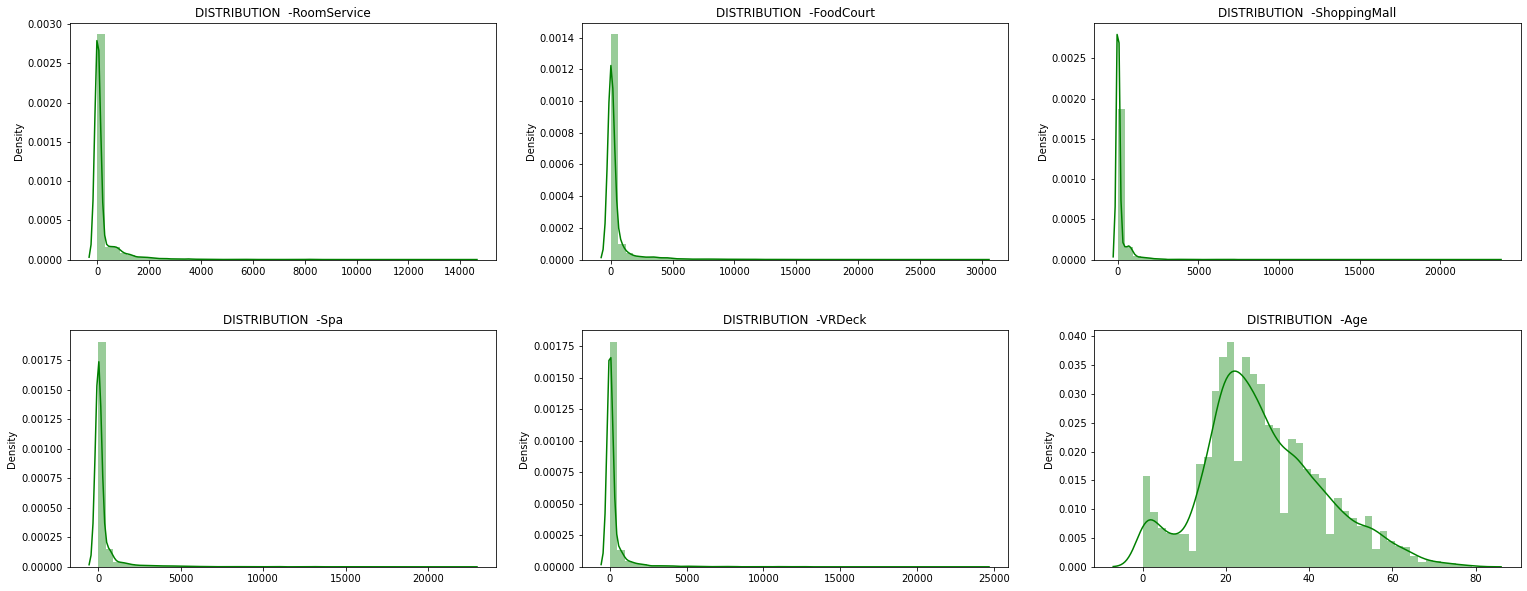

In [326]:

#Creating subplots
fig = plt.figure(figsize=(26,10))
spec = fig.add_gridspec(2,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
n=0
sec=[sec_01,sec_02,sec_03,sec_04,sec_05,sec_06]
for feature in data[numerical_feature]:
    pl=sns.distplot(x=data[feature], ax=sec[n], color='green')
    pl.set_title('DISTRIBUTION  -'+feature)
    n=n+1

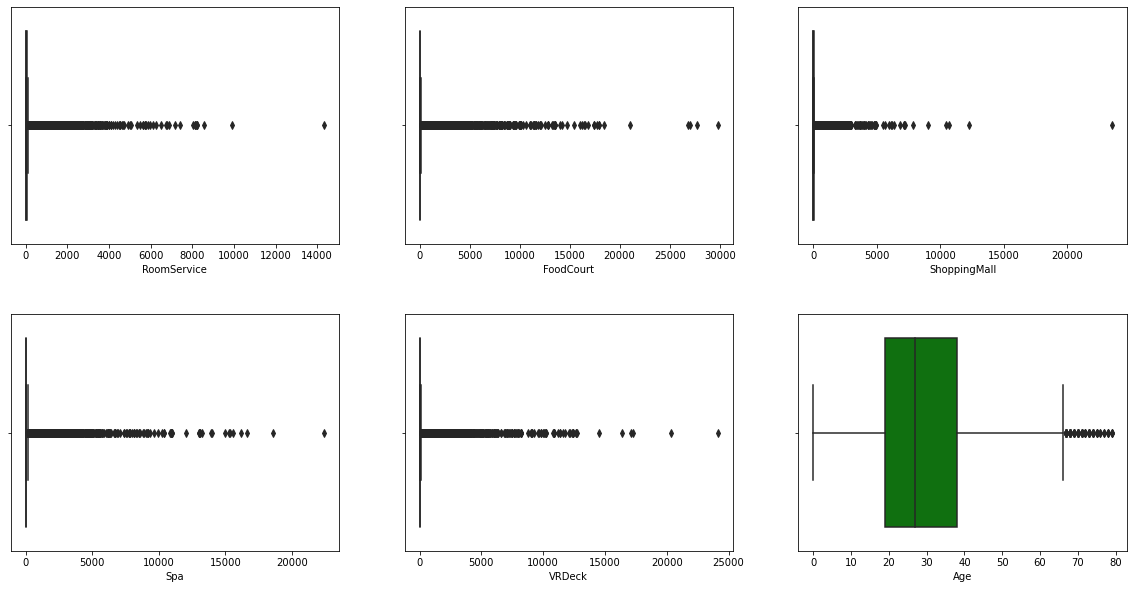

In [327]:

#Creating subplots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
n=0
sec=[sec_01,sec_02,sec_03,sec_04,sec_05,sec_06]
for feature in data[numerical_feature]:
     if data[feature].dtypes == 'float64':
            sns.boxplot(x=data[feature], ax=sec[n], color='green')
            n=n+1

            



In [329]:
print('Data type of categorical features: ')
for feature in data[categorical_feature]:
    # Data type of the missing feature
    
    print(f'{feature} is {data[feature].dtypes}')

Data type of categorical features: 
HomePlanet is object
CryoSleep is bool
Destination is object
VIP is bool


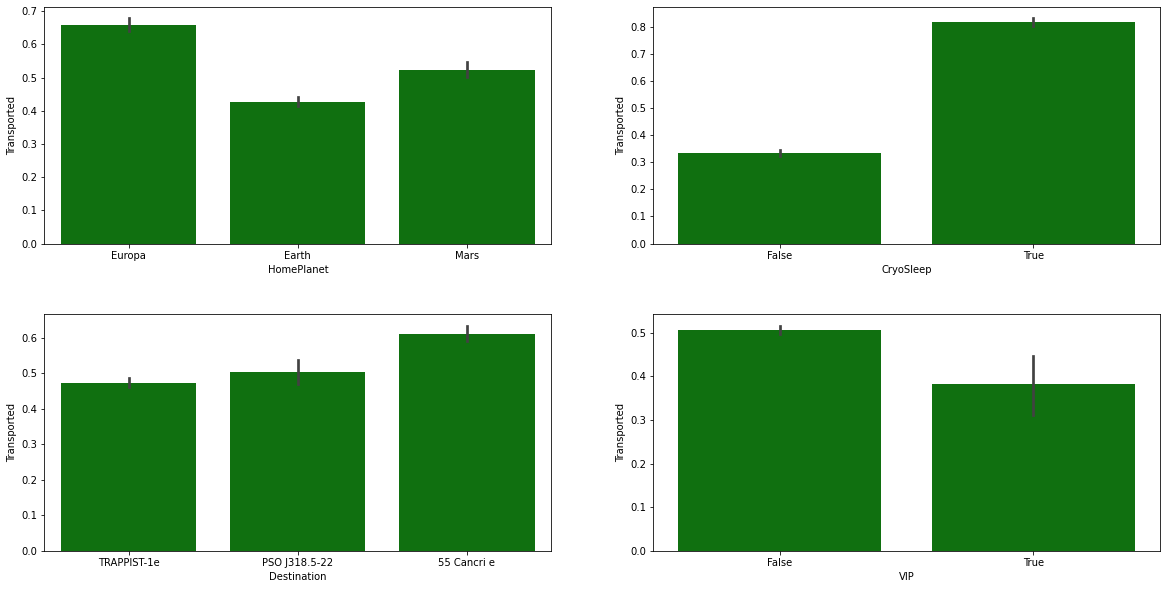

In [330]:

#Creating subplots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1,1])


n=0
sec=[sec_01,sec_02,sec_03,sec_04]
for feature in data[categorical_feature]:
    sns.barplot(x=feature,y='Transported' ,data=data,ax=sec[n], color='green')
    n=n+1

In [331]:
from scipy.stats import skew
for feature in data[numerical_feature]:
    print(f'Skewness {feature} - {skew(data[feature])}')


Skewness RoomService - 6.321489142251364
Skewness FoodCourt - 7.050505911568725
Skewness ShoppingMall - 12.698258910070267
Skewness Spa - 7.6129016781997905
Skewness VRDeck - 7.819574631956572
Skewness Age - 0.41995565196952533


In [333]:
#Data imbalance in categorical
for feature in data[categorical_feature]:
    percentage=data[feature].value_counts()/data[feature].count()*100
    print(f'{feature}-\n{percentage}\n\n')

HomePlanet-
Earth     55.251352
Europa    24.513977
Mars      20.234672
Name: HomePlanet, dtype: float64


CryoSleep-
False    65.063844
True     34.936156
Name: CryoSleep, dtype: float64


Destination-
TRAPPIST-1e      70.136892
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: Destination, dtype: float64


VIP-
False    97.710802
True      2.289198
Name: VIP, dtype: float64


